# Phan tich ANOVA

### Import thư viện cần thiết

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Đọc dữ liệu

In [2]:
df = pd.read_csv("../data/interim/handled_missing_values.csv")


In [3]:
df.head(5)

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106


### ANOVA

#### Xác định các cột biến phân loại

In [78]:
categorical_features =  df.select_dtypes([np.object_]).columns.to_list()
print(categorical_features)

['Gender', 'Physical_Activity', 'Smoking', 'Alcohol', 'Diet', 'Chronic_Diseases', 'Medication', 'Family_History', 'Mental_Health', 'Sleep', 'Education', 'Income']


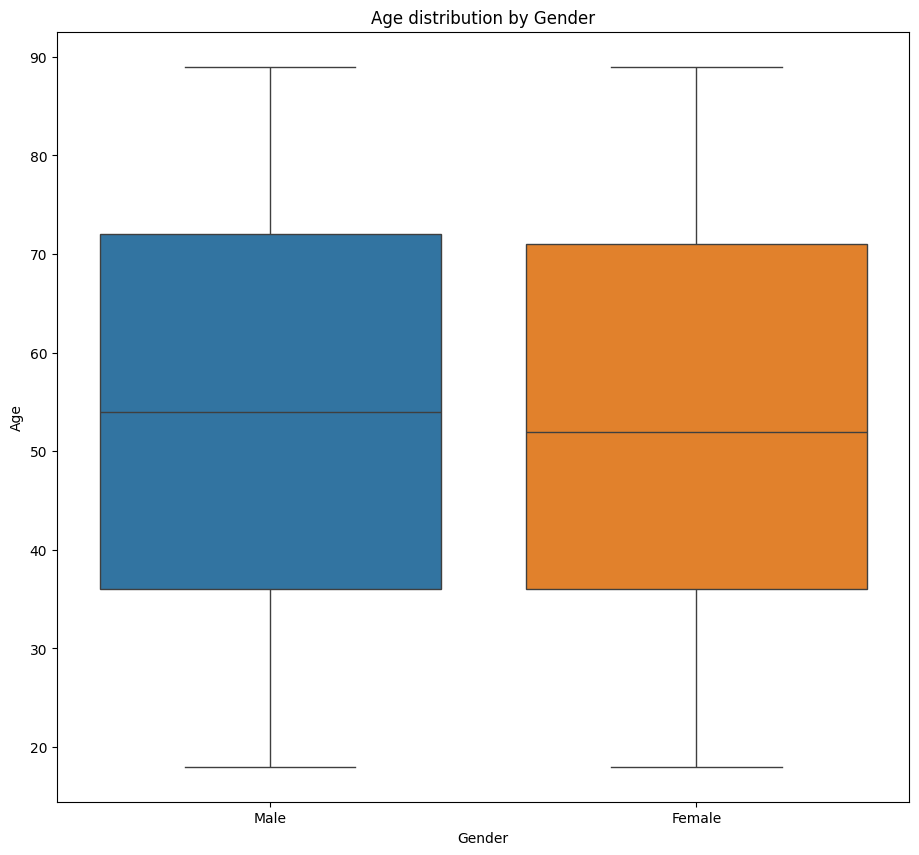

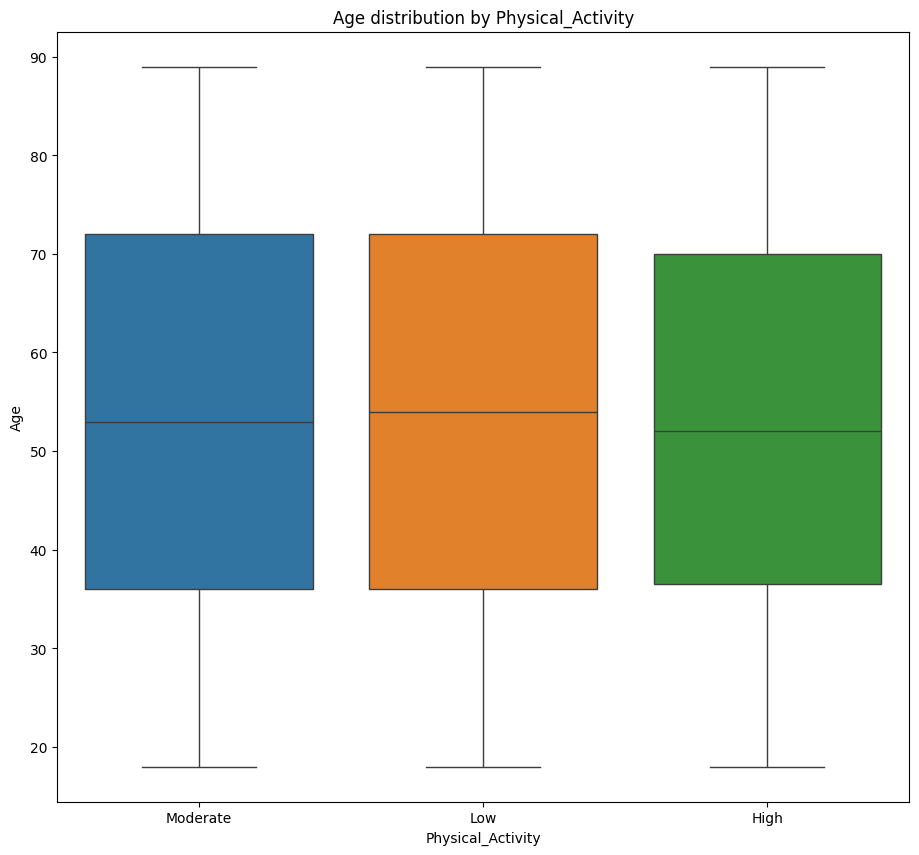

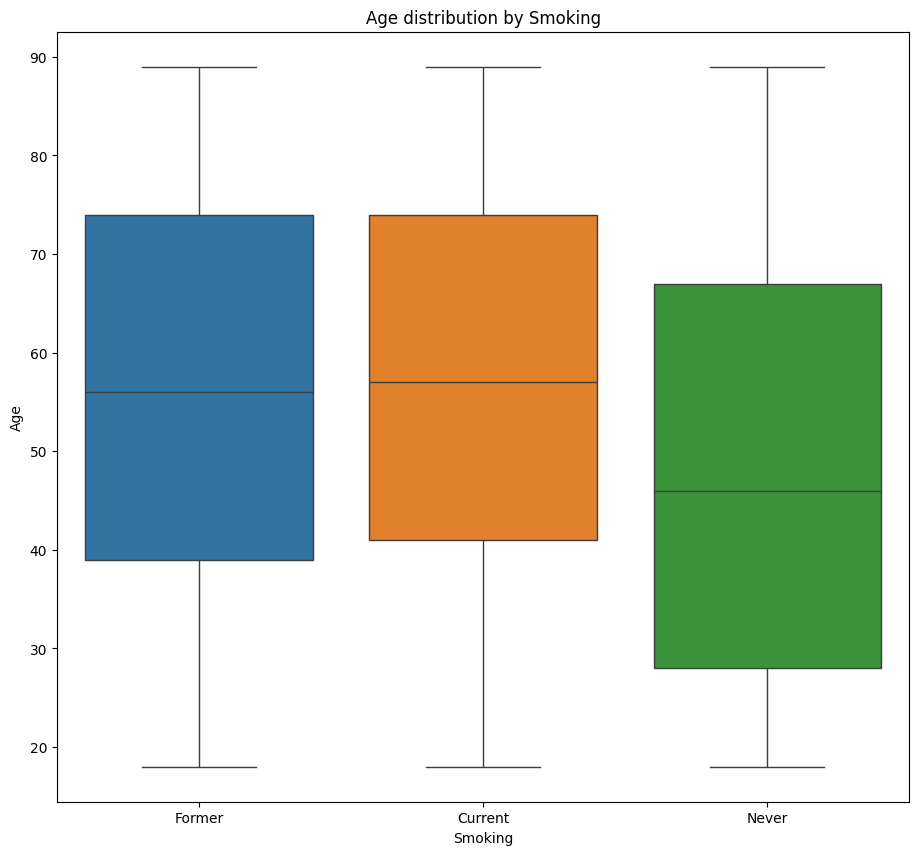

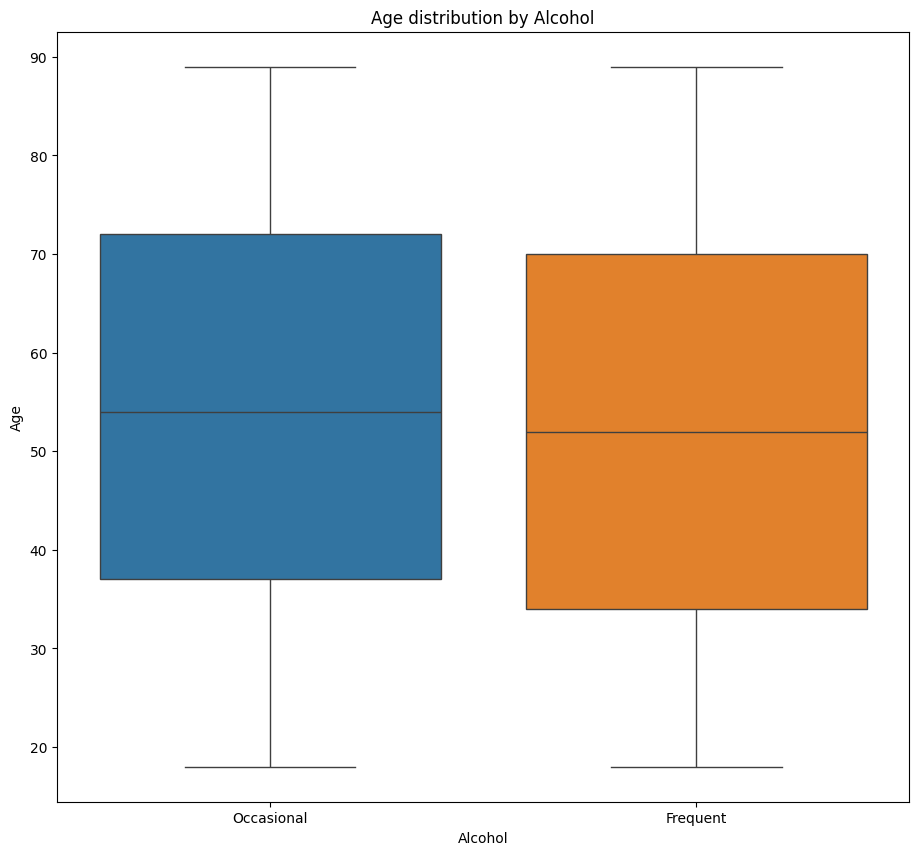

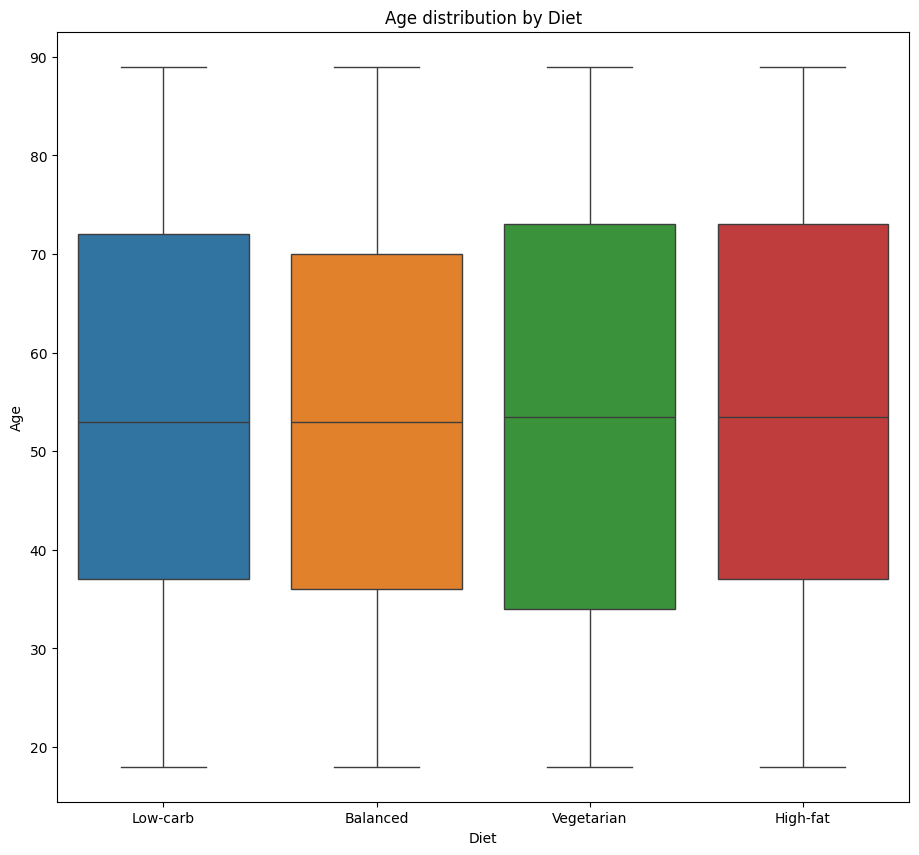

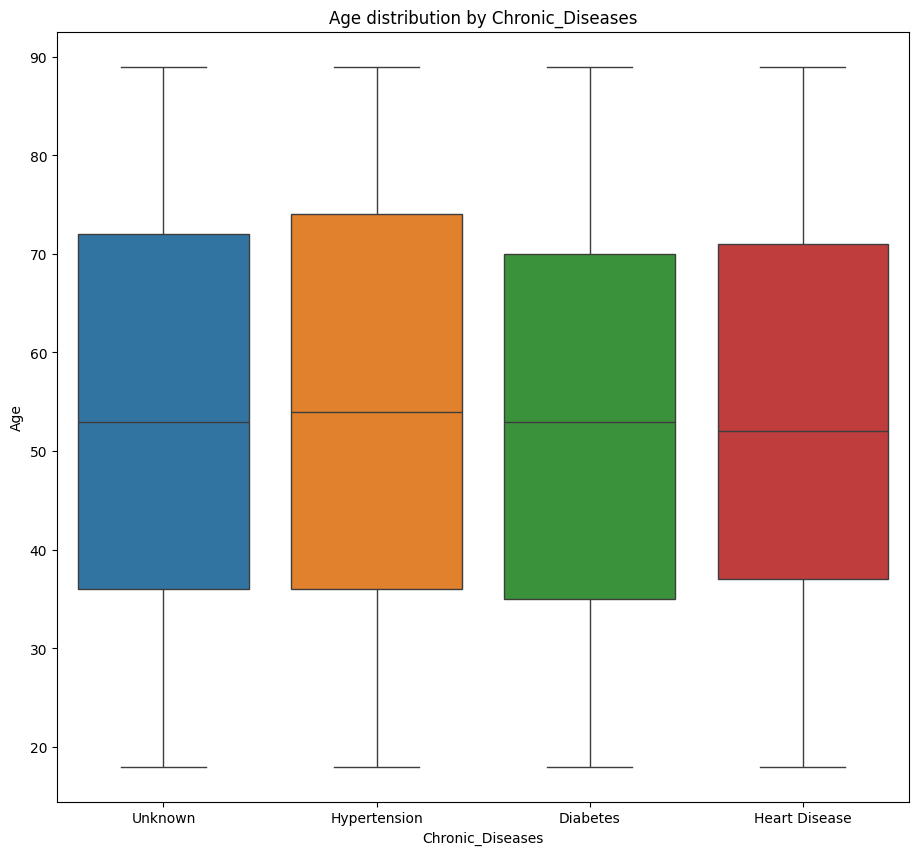

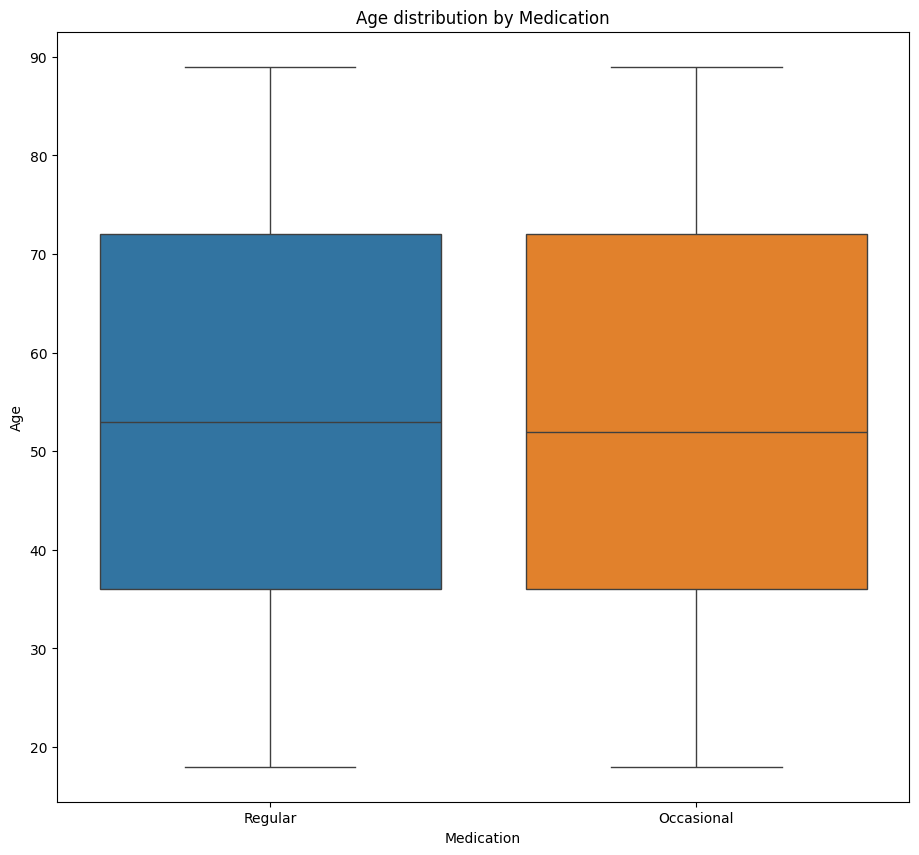

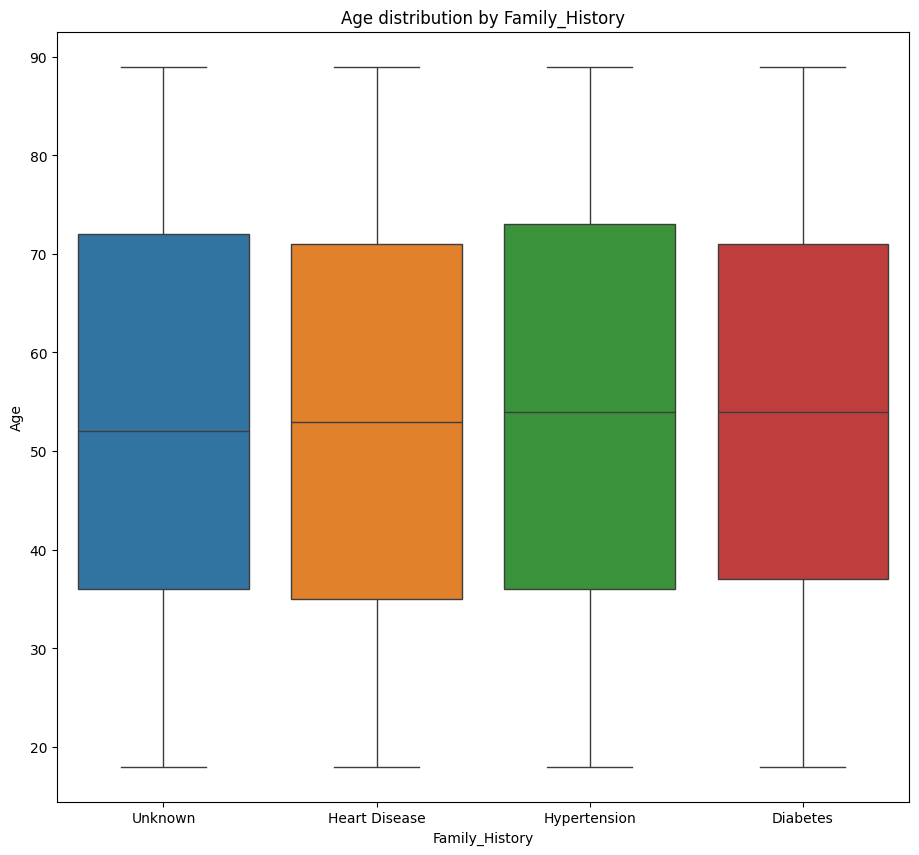

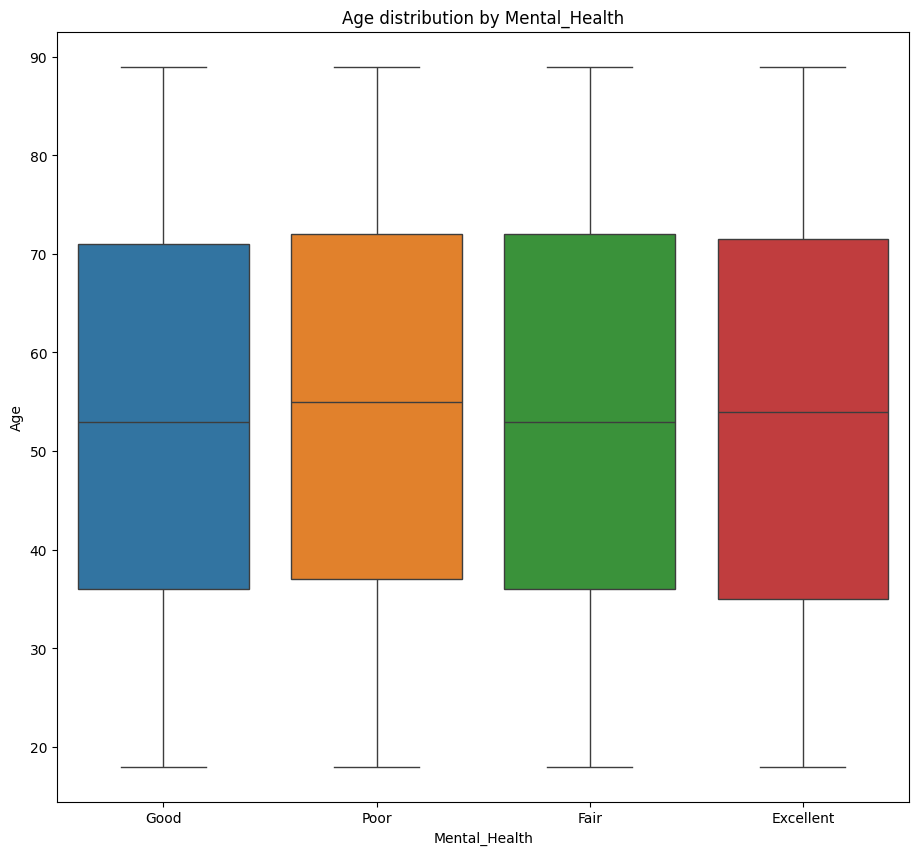

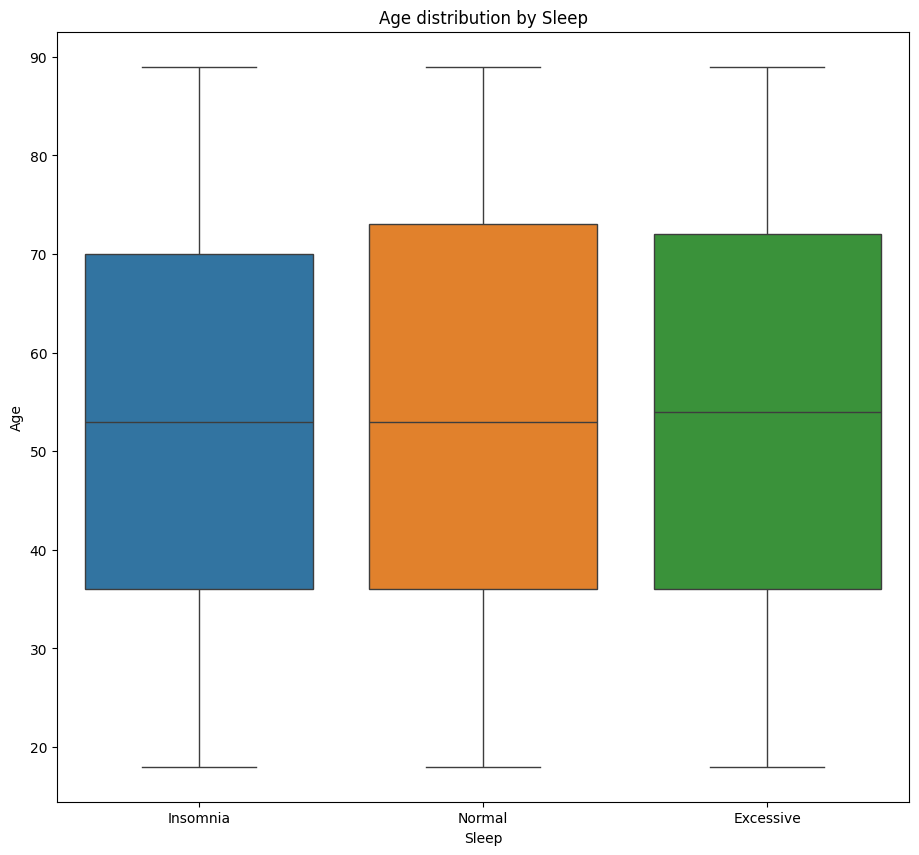

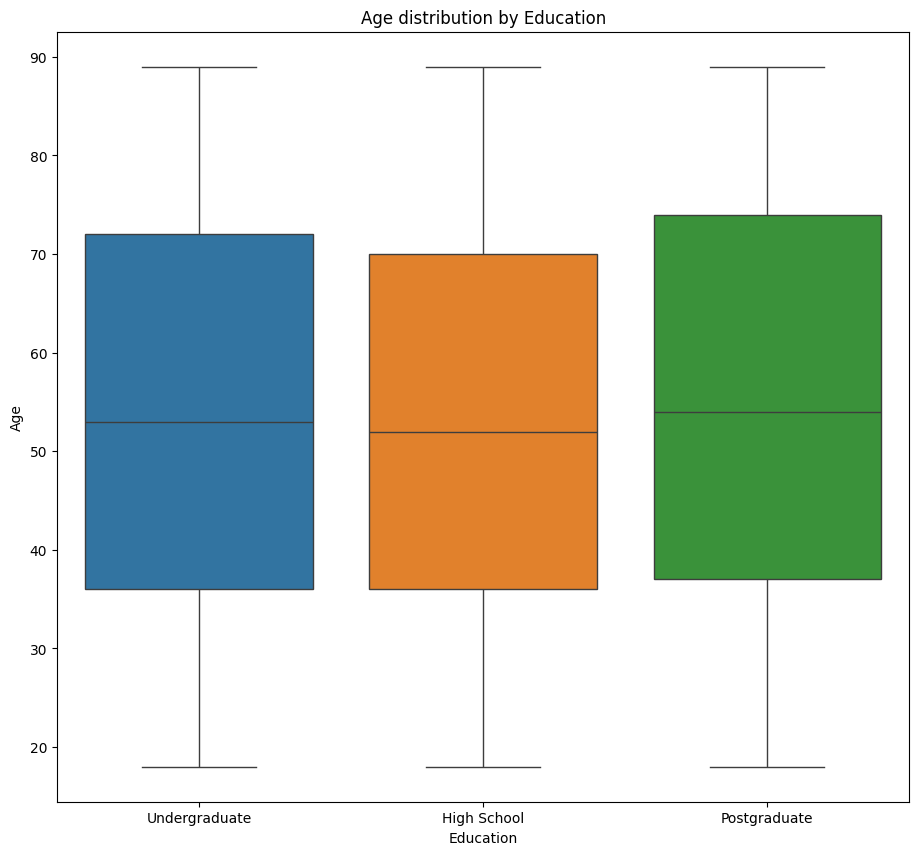

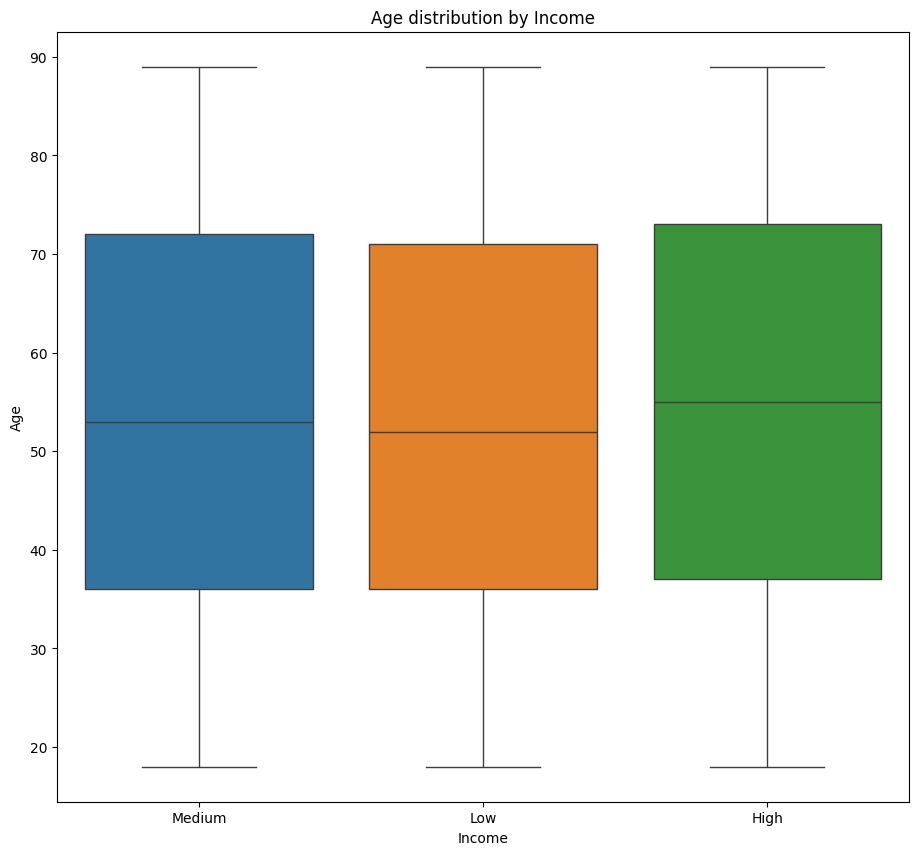

In [77]:
for category in categorical_features:
    f, ax = plt.subplots(figsize=(11,10))
    plt.title(f'Age distribution by {category}')
    sns.boxplot(data=df, y='Age', x=category, hue=category)
    plt.show()
    plt.close()    

#### Thực hiện kiểm tra ANOVA 1 way

In [19]:
grouped_anova_by_category_list = [df.groupby(category)['Age'].apply(list) for category in categorical_features]
anova_result_with_category = [(group.index.name, *stats.f_oneway(*group)) for group in grouped_anova_by_category_list]
df_anova = pd.DataFrame(data=anova_result_with_category, columns=['Category', 'F-value', 'P-Value'])
display(df_anova)



,Category,F-value,P-Value
0,Gender,1.414203,2.344541e-01
1,Physical_Activity,0.403386,6.680906e-01
2,Smoking,57.774765,2.400780e-25
3,Alcohol,3.208190,7.337134e-02
4,Diet,0.448886,7.181033e-01
5,Chronic_Diseases,0.582400,6.265395e-01
6,Medication,0.000005,9.982051e-01
7,Family_History,0.431574,7.304020e-01
8,Mental_Health,0.130240,9.421445e-01
9,Sleep,0.172821,8.412965e-01


#### Các biến quan trọng ảnh hưởng đến mục tiêu

In [22]:
alpha = 0.05
display(df_anova[df_anova['P-Value'] < alpha])

,Category,F-value,P-Value
2,Smoking,57.774765,2.400780e-25
